# Importações e Leitura do DataSet

In [85]:
import optuna as opt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score
from optuna.visualization import plot_optimization_history
 

In [3]:
df = pd.read_csv('churn.csv')


In [4]:
pd.set_option('display.max_columns', None)

In [5]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# Análise Exploratória

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Análise da variável Senior Citizen

In [8]:
df['SeniorCitizen'].unique()

array([0, 1])

### Análise da variável Tenure

In [9]:
df['tenure'].value_counts()

tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64

### Análise da Variável TotalCharges

In [10]:
df['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      shape=(6531,), dtype=object)

Verificamos que a variável total charges está com os valores no formato string ao invés de númericos

### Verificação de dados nulos

In [11]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Verificar valores duplicados

In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

# Processamento de dados

### remoção de colunas

In [14]:
df = df.drop(['customerID'], axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


### Transformação de variáveis

In [15]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


### Definindo as colunas categóricas

In [17]:
cat_cols = [
    "gender", "Partner", "Dependents", "PhoneService", "MultipleLines",
    "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection",
    "TechSupport", "StreamingTV", "StreamingMovies", "Contract",
    "PaperlessBilling", "PaymentMethod"
]

#### Aplicar One Hot Encoding

In [20]:
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [30]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   int64  
 1   tenure                                 7043 non-null   int64  
 2   MonthlyCharges                         7043 non-null   float64
 3   TotalCharges                           7032 non-null   float64
 4   Churn                                  7043 non-null   int64  
 5   gender_Male                            7043 non-null   bool   
 6   Partner_Yes                            7043 non-null   bool   
 7   Dependents_Yes                         7043 non-null   bool   
 8   PhoneService_Yes                       7043 non-null   bool   
 9   MultipleLines_No phone service         7043 non-null   bool   
 10  MultipleLines_Yes                      7043 non-null   bool   
 11  Inte

### fazendo o map do churn de forma manual

In [26]:
df_encoded['Churn'] = df_encoded['Churn'].map({'Yes': 1, 'No':0})

In [28]:
df_encoded['Churn'].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

### atribuindo o novo df_encoded ao df antigo

In [32]:
df = df_encoded

df

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,True,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,True,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,0,True,False,False,False,True,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,1,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,0,True,True,True,True,False,True,False,False,False,True,False,False,False,True,False,True,False,True,False,True,True,False,True,False,False,True
7039,0,72,103.20,7362.90,0,False,True,True,True,False,True,True,False,False,False,False,True,False,True,False,False,False,True,False,True,True,False,True,True,False,False
7040,0,11,29.60,346.45,0,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False
7041,1,4,74.40,306.60,1,True,True,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True


# Modelagem

### 1. Definindo as variavéis

In [33]:
X = df.drop('Churn', axis=1)
y = df['Churn']

### 2. Separar em treino e teste

In [34]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

### 3. Escolha e definição do modelo

In [35]:
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)

### 4. Treinamento do modelo

In [36]:
model_rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


### 5. Previsões

In [37]:
y_pred = model_rf.predict(X_test)
y_pred_proba = model_rf.predict_proba(X_test)[:,1]

### 6. Avaliações

In [40]:
print(f'Classification report \n{classification_report(y_test, y_pred)}')

Classification report 
              precision    recall  f1-score   support

           0       0.82      0.91      0.87      1036
           1       0.65      0.46      0.54       373

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.70      1409
weighted avg       0.78      0.79      0.78      1409



### 7. Matriz de Confusão

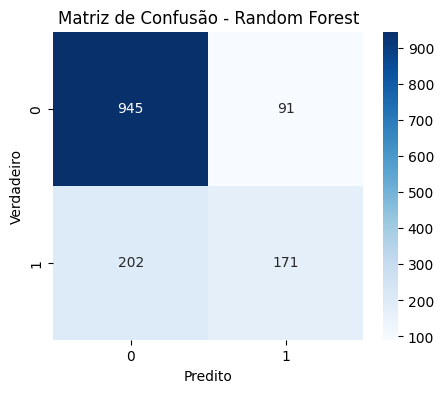

In [41]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusão - Random Forest")
plt.xlabel("Predito"); plt.ylabel("Verdadeiro")
plt.show()

### 8. Curva Roc

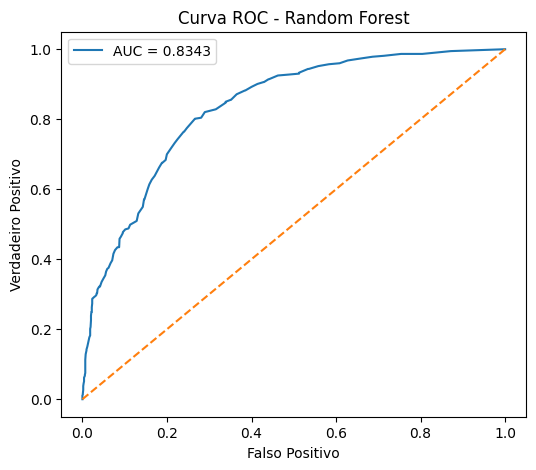

In [42]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
 
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}")
plt.plot([0,1],[0,1], linestyle="--")
plt.xlabel("Falso Positivo")
plt.ylabel("Verdadeiro Positivo")
plt.title("Curva ROC - Random Forest")
plt.legend()
plt.show()

### 9. Curva AUC PR

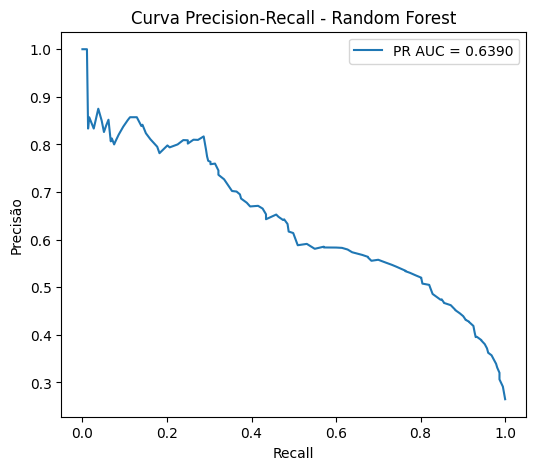

In [43]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)
 
plt.figure(figsize=(6,5))
plt.plot(recall, precision, label=f"PR AUC = {pr_auc:.4f}")
plt.xlabel("Recall")
plt.ylabel("Precisão")
plt.title("Curva Precision-Recall - Random Forest")
plt.legend()
plt.show()

### Light GBM

In [51]:
model_lgbm = LGBMClassifier(
    n_estimators=100,
    learning_rate=0.05,
    max_depth=-1,
    random_state=42
)
 
model_lgbm.fit(X_train, y_train)
 
y_pred_lgbm = model_lgbm.predict(X_test)
y_proba_lgbm = model_lgbm.predict_proba(X_test)[:, 1]
 
print("Classification Report - LightGBM")
print(classification_report(y_test, y_pred_lgbm))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1496, number of negative: 4138
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000503 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265531 -> initscore=-1.017418
[LightGBM] [Info] Start training from score -1.017418
Classification Report - LightGBM
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1036
           1       0.67      0.53      0.59       373

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409



## XGBoost

## Escolhendo o modelo

In [54]:
model_xgb = XGBClassifier(
    n_estimators=100,
    learning_rate=0.05,
    max_depth=6,
    random_state=42
)

## Treinamento e Previsão

In [57]:
model_xgb.fit(X_train, y_train)
 
y_pred_xgb = model_xgb.predict(X_test)
y_proba_xgb = model_xgb.predict_proba(X_test)[:, 1]

## Avaliações

In [58]:
print("Classification Report - XGBoost")
print(classification_report(y_test, y_pred_xgb))

Classification Report - XGBoost
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1036
           1       0.67      0.54      0.60       373

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409



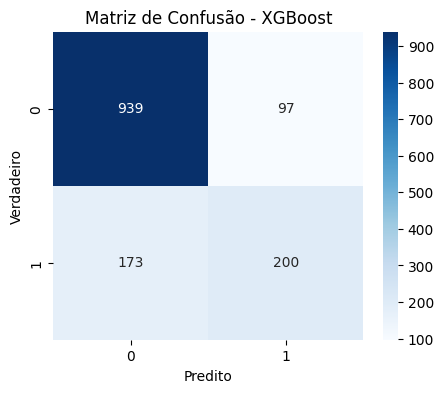

In [59]:
cm = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusão - XGBoost")
plt.xlabel("Predito"); plt.ylabel("Verdadeiro")
plt.show()

# Tuning de Hiperparametros

### 1. Definino função do Optuna

In [80]:
def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 1000),
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.3, log=True),
        "max_depth": trial.suggest_int("max_depth", 2, 15),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 20),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "gamma": trial.suggest_float("gamma", 0.0, 5.0),
        "reg_alpha": trial.suggest_float("reg_alpha", 0.0, 5.0),
        "reg_lambda": trial.suggest_float("reg_lambda", 0.0, 5.0),
        "use_label_encoder": False,
        "eval_metric": "logloss",
        "random_state": 42
    }

    X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)
    model = XGBClassifier(**params)
    model.fit(X_tr, y_tr, eval_set=[(X_val, y_val)], verbose=False)
    preds = model.predict(X_val)
    return f1_score(y_val, preds)

### **Explicação dos parametros***

* n_estimators - é o nº de árvores que serão treinados / força do modelo
* learning_rate	- taxa com que as árvores corrigem os erros (valor menor, menos risco de overfitting / valor maior risco de overfitting)	
* max_depth	profundidade das árvores / complexidade
* min_child_weight - mínimo para dividir / regularização
* subsample -  % de linhas por árvore
* colsample_bytree - % de colunas por árvore
* gamma	- redução minima de perda necessária para fazer split / regularização
* reg_alpha	- regularização L1 / simplificação do modelo
* reg_lambda - 	regularização L2 / estabilidade
* eval_metric - métrica de avaliação
* use_label_encoder	legado - deve ser False
* random_state - define a semente de reprodutibilidade

***Trial Suggest***

Funciona como sistema inteligente que testa combinações de parâmetros. Porém, só consegue fazer isso se souber o tipo de cada parametro

### 2. Executando o modelo

In [88]:
study = opt.create_study(direction="maximize")
study.optimize(objective, n_trials=3000)   # ajuste n_trials conforme o tempo disponível

print("\nBest trial params:")
print(study.best_trial.params)
print("Best F1 on validation (study.best_value):", study.best_value)

[I 2025-12-06 18:09:18,365] A new study created in memory with name: no-name-d05d943f-a353-469a-bcf3-43ce1ac6f5af
C:\Users\Aleksander\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:199: UserWarning: [18:09:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
[I 2025-12-06 18:09:18,623] Trial 0 finished with value: 0.6219739292364991 and parameters: {'n_estimators': 364, 'learning_rate': 0.07479374216238893, 'max_depth': 8, 'min_child_weight': 5, 'subsample': 0.5796555085788648, 'colsample_bytree': 0.6526598379808408, 'gamma': 2.9636253811304263, 'reg_alpha': 4.940657255573852, 'reg_lambda': 3.287815131094681}. Best is trial 0 with value: 0.6219739292364991.
C:\Users\Aleksander\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\P


Best trial params:
{'n_estimators': 551, 'learning_rate': 0.03304339186676979, 'max_depth': 7, 'min_child_weight': 8, 'subsample': 0.5524224235696589, 'colsample_bytree': 0.9213327175963458, 'gamma': 4.463763848059297, 'reg_alpha': 1.0627175190013616, 'reg_lambda': 2.695923335681107}
Best F1 on validation (study.best_value): 0.6494464944649446


### 3. Treinar o modelo com os melhores parametros

In [89]:
best_params = study.best_params
best_params["random_state"] = 42
best_params["eval_metric"] = "logloss"
best_params["use_label_encoder"] = False

final_model = XGBClassifier(**best_params)
final_model.fit(X_train, y_train)

y_pred_final = final_model.predict(X_test)
y_proba_final = final_model.predict_proba(X_test)[:,1]

print("\n--- Tuned XGBoost Classification Report ---")
print(classification_report(y_test, y_pred_final))
#print("ROC AUC (tuned):", roc_auc_score(y_test, y_proba_final))
print("F1 (tuned):", f1_score(y_test, y_pred_final))


C:\Users\Aleksander\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:199: UserWarning: [18:47:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



--- Tuned XGBoost Classification Report ---
              precision    recall  f1-score   support

           0       0.86      0.91      0.88      1036
           1       0.69      0.58      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409

F1 (tuned): 0.62882096069869
